In [1]:
%pylab
%matplotlib inline
%load_ext watermark
%watermark -v -p numpy,tensorflow

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib
CPython 3.5.6
IPython 6.5.0

numpy 1.15.2
tensorflow 1.13.1


1000개의 데이터 포인트를 만듭니다. x1은 평균값을 0으로 갖고 표준편차가 0.55인 정규분포를 생성합니다. y1은 x1의 데이터를 이용해 기울기는 0.1, y 절편은 0.3인 방정식을 이용해 만듭니다. 이때 y 절편에 평균값 0, 표준편차 0.03인 정규분포를 더하여 포인트를 방정식이 만드는 직선의 y축 방향으로 흩어지게 만듭니다.  

In [2]:
num_points = 1000
vectors_set = []
for i in range(num_points):
         x1 = np.random.normal(0.0, 0.55)
         y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
         vectors_set.append([x1, y1])

vectors_set는 list of list, 즉 2차원 배열로 이루어져 있습니다. 2차원의 첫번째 요소를 x_data에 두번째 요소를 y_data로 저장합니다.

In [3]:
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

x, y 좌표에 x_data, y_data 를 사용하여 붉은색 원으로 산포도를 그립니다.

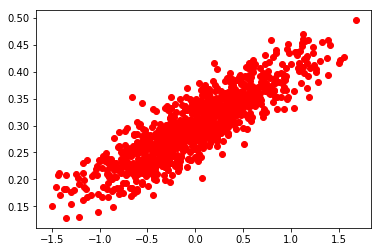

In [4]:
plt.plot(x_data, y_data, 'ro')
plt.show()

텐서플로우 패키지를 로드합니다.

In [5]:
import tensorflow as tf

-1~1 사이의 랜덤한 균등분포 값으로 1차원 엘리먼트가 한개인 가중치 텐서를 만듭니다. 바이어스 텐서는 0으로 초기화된 엘리먼트를 갖는 1차원 텐서입니다.

In [6]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

Instructions for updating:
Colocations handled automatically by placer.


loss 함수를 정의하고 최적화 방법은 학습속도 0.5인 그래디언트 디센트를 사용합니다.

In [7]:
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

모든 변수를 초기화하고 세션을 시작합니다.

In [8]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

8번 반복하면서 train을 실행시킵니다. 반복마다 W, b 값의 변화를 프린트하고 그래프로 직선의 기울기의 변화를 살펴봅니다.

0 [0.32012874] [0.30125344] 0.016234325


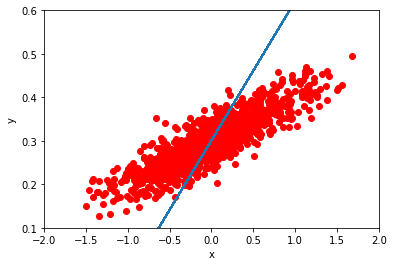

1 [0.25115544] [0.30096257] 0.0082004005


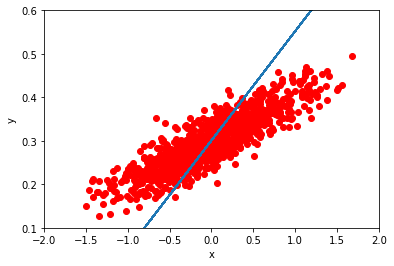

2 [0.20365202] [0.3007647] 0.0043896087


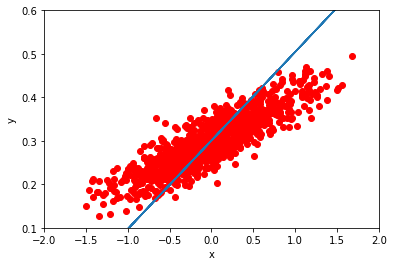

3 [0.17093539] [0.30062845] 0.002582007


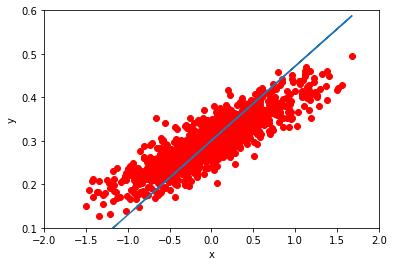

4 [0.14840275] [0.3005346] 0.0017245946


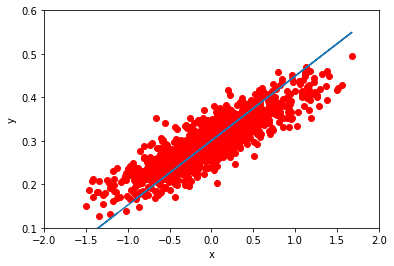

5 [0.13288403] [0.30047] 0.0013178912


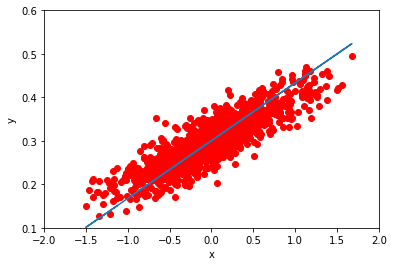

6 [0.12219594] [0.30042547] 0.0011249763


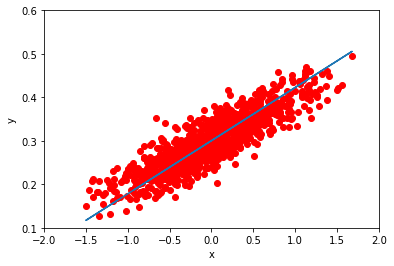

7 [0.11483482] [0.3003948] 0.0010334697


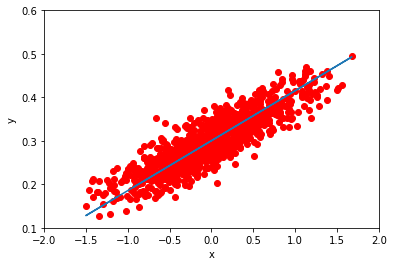

In [9]:
for step in range(8):
    sess.run(train)
    print(step, sess.run(W), sess.run(b), sess.run(loss))
    # 산포도 그리기
    plt.plot(x_data, y_data, 'ro')
    # 직선 그리기
    plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
    # x, y 축 레이블링을 하고 각 축의 최대, 최소값 범위를 지정합니다.
    plt.xlabel('x')
    plt.xlim(-2,2)
    plt.ylim(0.1,0.6)
    plt.ylabel('y')
    plt.show()